In [10]:
# import required libraries
import sys
import re
import pandas as pd
import spacy
from pymongo import MongoClient

In [11]:
# define params for db operations
uri = 'mongodb://localhost:27017/'
database = 'zs_database'
collection_fetch = 'autotags_v2'
collection_push = 'similarities'

# initiate variables
df = pd.DataFrame()
db = object

# connect to db. TODO: Handle exception cases
client = MongoClient(uri)
db = client[database]

# retrieving required data
df = pd.DataFrame(list(db[collection_fetch].find({}, {"_id":0, "lemma_list_without_verbs": 1, "story_id": 1})))

df

,story_id,lemma_list_without_verbs
0,19,"[Radio, ÜberAll, Zukunftsmusik, Mikrofon, Krum..."
1,21,"[Dorf, SauerstoffMathilda, missmutig, Fenster,..."
2,24,"[lang, Witwer, einzig, Tochter, Mutter, Mädche..."
3,25,"[Beste, Party, Buffet, Sinn, Deftigem, Blick, ..."
4,27,"[Endlose, Laubwälder, saftig, Weide, Wildblume..."
...,...,...
195,489,"[Familie, alt, HausErster, Suche, Ausweg, Weiß..."
196,490,"[Wolkenland, Glück, Merkmal, Wolkenlandes, Sky..."
197,491,"[Tag, komplett, Welt, schwarzweiß, Umweltzerst..."
198,492,"[Goldene, Sonnenstrahlen, klaren, Wasseroberfl..."


In [12]:
import gensim
import string
from gensim import corpora
from gensim.corpora.dictionary import Dictionary

In [13]:
final_doc = df["lemma_list_without_verbs"]
final_doc

0      [Radio, ÜberAll, Zukunftsmusik, Mikrofon, Krum...
1      [Dorf, SauerstoffMathilda, missmutig, Fenster,...
2      [lang, Witwer, einzig, Tochter, Mutter, Mädche...
3      [Beste, Party, Buffet, Sinn, Deftigem, Blick, ...
4      [Endlose, Laubwälder, saftig, Weide, Wildblume...
                             ...                        
195    [Familie, alt, HausErster, Suche, Ausweg, Weiß...
196    [Wolkenland, Glück, Merkmal, Wolkenlandes, Sky...
197    [Tag, komplett, Welt, schwarzweiß, Umweltzerst...
198    [Goldene, Sonnenstrahlen, klaren, Wasseroberfl...
199    [Mutter, verschlafen, Dorf, namens, Natura, Ge...
Name: lemma_list_without_verbs, Length: 200, dtype: object

In [14]:
final_doc[0]

['Radio',
 'ÜberAll',
 'Zukunftsmusik',
 'Mikrofon',
 'Krumpel',
 'Stay',
 'tunded',
 'dranDas',
 'Wissen',
 'Zukunft',
 'Sendeplatz',
 'Wolke',
 'grandios',
 'Überblick',
 'All',
 'unterm',
 'All',
 'berAllDas',
 'Beste',
 'Erde',
 'Luft',
 'frischen',
 'köstliche',
 'Luft',
 'Lied',
 'Luft',
 'dirDie',
 'Erde',
 'knallbuntimmer',
 'blau',
 'leuchten',
 'Allfinde',
 'hierwas',
 'meist',
 'Luft',
 'seltene',
 'Gemischbestehend',
 'Stickstoff',
 'Sauerstoffund',
 'mehrdamit',
 'quietschtaus',
 'Ventil',
 'schönste',
 'Schlafmusik',
 'frupsIch',
 'Stimme',
 'Radio',
 'ÜberAll',
 'Sause',
 'Überschall',
 'durchs',
 'All',
 'Rand',
 'Erde',
 'Boden',
 'Planet',
 'groß',
 'Sand',
 'mein',
 'Fuß',
 'Beton',
 'Beton',
 'Kopf',
 'Sound',
 'Rhythmus',
 'gut',
 'Laune',
 'Lied',
 'Radio',
 'ÜberAll',
 'ZukunftsmusikDas',
 'Menschenkinder',
 'Radio',
 'ÜberAll',
 'online',
 'Mitstimme',
 'AdaIhr',
 'seltsam',
 'Name',
 'Krumpel',
 'Originalton',
 'Ada',
 'krumplig',
 'Falte',
 'Stimmung',
 'Tiefe

In [15]:
dictionary = corpora.Dictionary(final_doc)

DT_matrix = [dictionary.doc2bow(doc) for doc in final_doc]

Lda_object = gensim.models.ldamodel.LdaModel

In [16]:
lda_model_1 = Lda_object(DT_matrix, num_topics=20, id2word = dictionary)

print(lda_model_1.print_topics(num_topics=20, num_words=4))

[(0, '0.006*"Baum" + 0.006*"Kind" + 0.005*"Vater" + 0.005*"Tier"'), (1, '0.004*"Hand" + 0.004*"Vater" + 0.004*"Tier" + 0.004*"Kind"'), (2, '0.005*"Auge" + 0.004*"Hand" + 0.004*"Welt" + 0.004*"Mutter"'), (3, '0.005*"Frau" + 0.005*"Baum" + 0.005*"Auge" + 0.005*"Kopf"'), (4, '0.006*"Auge" + 0.004*"Kopf" + 0.004*"Wasser" + 0.004*"Hand"'), (5, '0.006*"Wald" + 0.005*"Mutter" + 0.005*"Auge" + 0.004*"alt"'), (6, '0.005*"Tier" + 0.005*"Auge" + 0.004*"Erde" + 0.004*"Haus"'), (7, '0.006*"Hand" + 0.005*"Auge" + 0.005*"Haus" + 0.004*"Frau"'), (8, '0.004*"Haus" + 0.004*"Auge" + 0.004*"Eltern" + 0.004*"Tier"'), (9, '0.005*"Auge" + 0.005*"Vater" + 0.004*"Baum" + 0.004*"Frau"'), (10, '0.005*"Hand" + 0.005*"Vater" + 0.004*"Baum" + 0.004*"Schule"'), (11, '0.006*"Erde" + 0.005*"Auge" + 0.004*"Frau" + 0.004*"Kopf"'), (12, '0.004*"Vater" + 0.004*"Frau" + 0.004*"alt" + 0.004*"Welt"'), (13, '0.005*"Wald" + 0.005*"Auge" + 0.005*"mein" + 0.004*"Kopf"'), (14, '0.006*"Hand" + 0.005*"Igel" + 0.004*"Auge" + 0.004*"

In [17]:
doc_lda = lda_model_1[DT_matrix]

In [18]:
doc_lda

In [19]:
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [20]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_1.log_perplexity(DT_matrix))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_1, texts=final_doc, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -11.000435619256034

Coherence Score:  0.2642005528240486


In [21]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model_1, DT_matrix, dictionary)
pyLDAvis.save_html(vis, 'lda.html')

In [23]:
from gensim.models.wrappers import LdaMallet
import os
os.environ.update({'MALLET_HOME':r'C:\\Users\\49175\\Documents\\js_seminar\\group_a\\model-training\\mallet-2.0.8\\mallet-2.0.8\\'})
mallet_path = 'C:\\Users\\49175\\Documents\\js_seminar\\group_a\\model-training\\mallet-2.0.8\\mallet-2.0.8\\bin\\mallet'

ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=DT_matrix, num_topics=10, id2word=dictionary)

In [24]:
print(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=final_doc, dictionary=dictionary, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(0, [('Baum', 0.044665948275862066), ('Wald', 0.0359375), ('Pflanze', 0.011691810344827587), ('Wasser', 0.010129310344827586), ('Ast', 0.008243534482758622), ('Haus', 0.008243534482758622), ('Wiese', 0.0078125), ('alt', 0.007704741379310345), ('Tier', 0.007543103448275862), ('Auge', 0.0071659482758620685)]), (1, [('Frau', 0.012911943547781699), ('Papa', 0.010359582613917874), ('Geist', 0.008032429997747916), ('Fahrrad', 0.007356805044666317), ('Mama', 0.007356805044666317), ('Schule', 0.007356805044666317), ('Haus', 0.006005555138503115), ('Hand', 0.005480069063884093), ('nächst', 0.005254860746190226), ('Kopf', 0.005254860746190226)]), (2, [('Meer', 0.022516887665749313), ('Wasser', 0.018326244683512634), ('Strand', 0.015511633725293971), ('Müll', 0.01532399299474606), ('Mama', 0.012947210407805854), ('Papa', 0.01138353765323993), ('Kind', 0.01057042782086565), ('Plastik', 0.009882411808856642), ('Insel', 0.009507130347760821), ('Lara', 0.009507130347760821)]), (3, [('Biene', 0.01896

In [25]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [26]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=DT_matrix, texts=final_doc, start=2, limit=40, step=6)

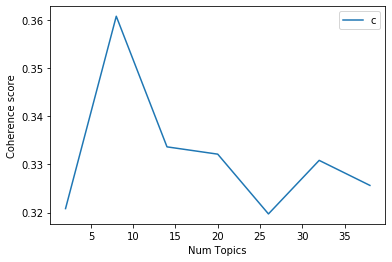

In [27]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [28]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3208
Num Topics = 8  has Coherence Value of 0.3607
Num Topics = 14  has Coherence Value of 0.3336
Num Topics = 20  has Coherence Value of 0.3321
Num Topics = 26  has Coherence Value of 0.3197
Num Topics = 32  has Coherence Value of 0.3308
Num Topics = 38  has Coherence Value of 0.3256


In [45]:
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
print(optimal_model.print_topics(num_words=5))

[(0, '0.031*"Baum" + 0.025*"Wald" + 0.011*"Tier" + 0.010*"Biene" + 0.010*"Pflanze"'), (1, '0.021*"Mutter" + 0.019*"Vater" + 0.016*"Eltern" + 0.014*"Welt" + 0.013*"Kind"'), (2, '0.018*"Mama" + 0.018*"Erde" + 0.017*"Papa" + 0.014*"Schule" + 0.011*"Auto"'), (3, '0.019*"Müll" + 0.013*"Meer" + 0.012*"Wasser" + 0.012*"Strand" + 0.010*"Tier"'), (4, '0.023*"Wasser" + 0.012*"Eis" + 0.012*"Schnee" + 0.011*"Insel" + 0.009*"Tante"'), (5, '0.017*"Erde" + 0.011*"Luft" + 0.009*"Auge" + 0.009*"Licht" + 0.008*"Himmel"'), (6, '0.021*"Frau" + 0.019*"Hand" + 0.011*"Auge" + 0.009*"Mann" + 0.009*"Blick"'), (7, '0.012*"Tier" + 0.008*"Eisbären" + 0.007*"laut" + 0.007*"Igel" + 0.006*"Luft"')]


In [51]:
pd.set_option('display.max_columns', None)  
def format_topics_sentences(ldamodel, corpus=DT_matrix, texts=final_doc):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=DT_matrix, texts=final_doc)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(200)
df_dominant_topic.to_csv(r'file.csv',header=True)

In [47]:
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.7180,"Baum, Wald, Tier, Biene, Pflanze, Auge, Blume,...","[dicke, Baum, bunt, Wiese, Hundert, dick, Stam..."
1,1.0,0.6462,"Mutter, Vater, Eltern, Welt, Kind, alt, Leben,...","[entspannen, Hafen, bevor, Zug, einsteigen, He..."
2,2.0,0.9435,"Mama, Erde, Papa, Schule, Auto, Klima, Frau, K...","[Tag, März, Kinderzimmer, Hausaufgaben, Lust, ..."
3,3.0,0.6625,"Müll, Meer, Wasser, Strand, Tier, Tim, Plastik...","[blau, gelb, schimmernd, Körper, Ecke, Riffs, ..."
4,4.0,0.6523,"Wasser, Eis, Schnee, Insel, Tante, Meer, Vater...","[Kailano, QualmpulverschnurKailano, qualmend, ..."
5,5.0,0.7882,"Erde, Luft, Auge, Licht, Himmel, Weg, Opa, Sta...","[SilburnWas, Hitze, Sommer, heißen, Fluß, Wies..."
6,6.0,0.5650,"Frau, Hand, Auge, Mann, Blick, Kopf, Schulter,...","[Pausenklingel, letzt, Satz, mein, Teller, Pun..."
7,7.0,0.7120,"Tier, Eisbären, laut, Igel, Luft, Kuh, Eichhör...","[sonnen, Bürgermeister, Mikrofon, Bühne, Publi..."


In [48]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics.head(20)



,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,5.0,"Erde, Luft, Auge, Licht, Himmel, Weg, Opa, Sta...",33.0,0.165
1.0,2.0,"Mama, Erde, Papa, Schule, Auto, Klima, Frau, K...",36.0,0.180
2.0,5.0,"Erde, Luft, Auge, Licht, Himmel, Weg, Opa, Sta...",30.0,0.150
3.0,2.0,"Mama, Erde, Papa, Schule, Auto, Klima, Frau, K...",21.0,0.105
4.0,3.0,"Müll, Meer, Wasser, Strand, Tier, Tim, Plastik...",22.0,0.110
5.0,5.0,"Erde, Luft, Auge, Licht, Himmel, Weg, Opa, Sta...",18.0,0.090
6.0,7.0,"Tier, Eisbären, laut, Igel, Luft, Kuh, Eichhör...",23.0,0.115
7.0,3.0,"Müll, Meer, Wasser, Strand, Tier, Tim, Plastik...",17.0,0.085
8.0,7.0,"Tier, Eisbären, laut, Igel, Luft, Kuh, Eichhör...",NaN,NaN
9.0,5.0,"Erde, Luft, Auge, Licht, Himmel, Weg, Opa, Sta...",NaN,NaN


In [49]:
data = df_dominant_topics.head(1)[['Topic_Keywords']]
print(data[1])

KeyError: 1